# 🚀 Financial Domain - Data Analysis 

------------------

Conducted end-to-end data analysis on financial loan datasets to identify approval trends, customer risk profiles, and key factors influencing loan decisions. Applied Exploratory Data Analysis (EDA), data cleaning, and statistical techniques to generate actionable business insights for credit risk evaluation.

-------------------------------------

### **BRD 1: SUMMARY**
**Key Performance Indicators (KPIs) Requirements:**

1. Total Loan Applications: We need to calculate the total number of loan applications received during a specified period. Additionally, it is essential to monitor the Month-to-Date (MTD) Loan Applications.
2. Total Funded Amount: Understanding the total amount of funds disbursed as loans is crucial. We also want to keep an eye on the MTD Total Funded Amount metric.
3. Total Amount Received: Tracking the total amount received from borrowers is essential for assessing the bank's cash flow and loan repayment. We should analyse the Month-to-Date (MTD) Total Amount Receive.
4. Average Interest Rate: Calculating the average interest rate across all loans which will provide insights into our lending portfolio's overall cost.
5. Average Debt-to-Income Ratio (DTI): Evaluating the average DTI for our borrowers helps us gauge their financial health. We need to compute the average DTI for all loans.

### **BRD 2: OVERVIEW**
**CHARTS**

1. Monthly Trends by Issue Date (Line/ Area Chart):  To identify seasonality and long-term trends in lending activities.
2. Regional Analysis by State (Bar Chart): To identify regions with significant lending activity and assess regional disparities
3. Loan Term Analysis (Donut Chart): To allow the client to understand the distribution of loans across various term lengths.
4. Employee Length Analysis (Bar Chart): How lending metrics are distributed among borrowers with different employment lengths, helping us assess the impact of employment history on loan applications.
5. Loan Purpose Breakdown (Bar Chart): Will provide a visual breakdown of loan metrics based on the stated purposes of loans, aiding in the understanding of the primary reasons borrowers seek financing.
6. Home Ownership Analysis (Tree/ Heat Map): For a hierarchical view of how home ownership impacts loan applications and disbursements.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # to create simple 2 dimensional charts like pie and dount charts.
import seaborn as sns # made on matlpotlib to more advance charts.
import warnings
import plotly.express as px # to creating intreactive advance charts , mainly for line charts and area charts. 

## Load Dataset

In [2]:
df = pd.read_excel(r"C:\Users\Shivam Mourya\DA pro\Financial Domain\financial_loan.xlsx" )

In [3]:
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     38576 non-null  int64         
 1   address_state          38576 non-null  object        
 2   application_type       38576 non-null  object        
 3   emp_length             38576 non-null  object        
 4   emp_title              37138 non-null  object        
 5   grade                  38576 non-null  object        
 6   home_ownership         38576 non-null  object        
 7   issue_date             38576 non-null  datetime64[ns]
 8   last_credit_pull_date  38576 non-null  datetime64[ns]
 9   last_payment_date      38576 non-null  datetime64[ns]
 10  loan_status            38576 non-null  object        
 11  next_payment_date      38576 non-null  datetime64[ns]
 12  member_id              38576 non-null  int64         
 13  p

In [5]:
df.describe()

,id,issue_date,last_credit_pull_date,last_payment_date,next_payment_date,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,38576,38576,38576,38576,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,2021-07-16 02:31:35.562007040,2021-06-08 13:36:34.193280512,2021-06-26 09:52:08.909166080,2021-07-26 20:42:20.605557760,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
min,5.473400e+04,2021-01-01 00:00:00,2021-01-08 00:00:00,2021-01-08 00:00:00,2021-02-08 00:00:00,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,2021-04-11 00:00:00,2021-04-15 00:00:00,2021-03-16 00:00:00,2021-04-16 00:00:00,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,2021-07-11 00:00:00,2021-05-16 00:00:00,2021-06-14 00:00:00,2021-07-14 00:00:00,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,2021-10-11 00:00:00,2021-08-13 00:00:00,2021-09-15 00:00:00,2021-10-15 00:00:00,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,2021-12-12 00:00:00,2022-01-20 00:00:00,2021-12-15 00:00:00,2022-01-15 00:00:00,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000
std,2.113246e+05,NaN,NaN,NaN,NaN,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777


-------------------------------

**Key Performance Indicators (KPIs) Requirements:**

## 1. Total Loan Applications

In [6]:
print(f"Total Number of Applications: {df["id"].count()}")

Total Number of Applications: 38576


### Month to Date (MTD) Total Applications

In [7]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]
mtd_loan_application = mtd_data['id'].count()

print(f"MTD Loan Application(for {latest_issue_date.strftime('%B %Y')}): {mtd_loan_application}")

MTD Loan Application(for December 2021): 4314


## 2.Total Funded Amount

In [8]:
total_funded_amount = df["loan_amount"].sum()
total_funded_amount_millions = total_funded_amount / 1000000
print(f" Total Funded Amount: ${total_funded_amount_millions:.2f} Million")

 Total Funded Amount: $435.76 Million


### Month to Date (MTD) Total Funded Amount

In [9]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]
mtd_funded_amount = mtd_data['loan_amount'].sum()
mtd_funded_amount_million = mtd_funded_amount / 1000000

print(f"MTD - Total Funded Amount(for {latest_issue_date.strftime('%B %Y')}): ${mtd_funded_amount_million:.2f} Million")

MTD - Total Funded Amount(for December 2021): $53.98 Million


## 3.Total Amount Received

In [10]:
total_payment = df['total_payment'].sum()
total_payment_millions = total_payment / 1000000

print(f"Total Amount Received: ${total_payment_millions:.2f} Millions")

Total Amount Received: $473.07 Millions


### Month to Date (MTD) Total Amount Received

In [11]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]
mtd_total_payment = mtd_data['total_payment'].sum()
mtd_total_payment_millions = mtd_total_payment / 1000000

print(f"MTD - Total Amount Received(for {latest_issue_date.strftime('%B %Y')}): ${mtd_total_payment_millions:.2f} Million")

MTD - Total Amount Received(for December 2021): $58.07 Million


## 4. Average Interest Rate

In [12]:
avg_int = df['int_rate'].mean()*100
print(f"Average Interest Rate : {avg_int:.2f}%")

Average Interest Rate : 12.05%


## 5. Average Debt-to-Income Ratio (DTI)

In [13]:
avg_dti = df['dti'].mean()*100
print(f"Average DTI : {avg_dti:.2f}%")

Average DTI : 13.33%


-------------------------------

# **Charts**

## 1. Monthly Trends by Issue Date For Funded Amount (Line/ Area Chart)

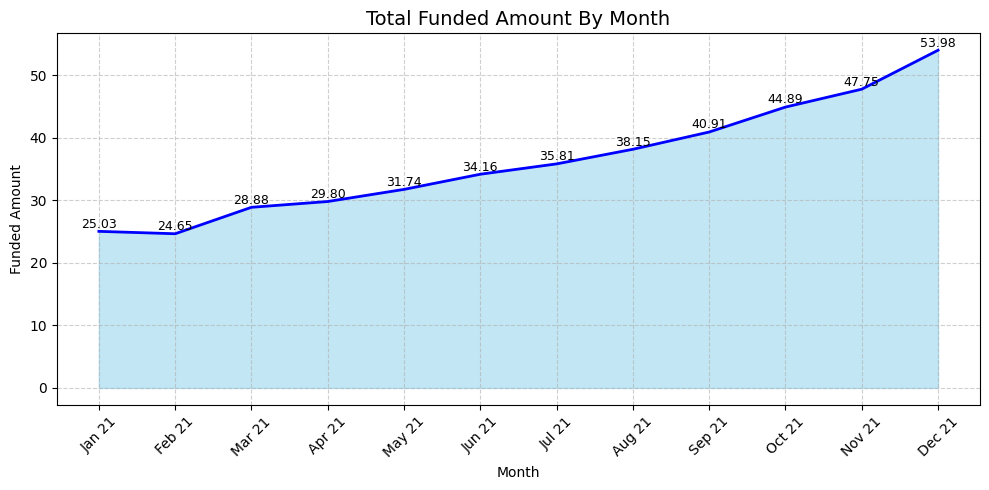

In [14]:
monthly_funded= (
    df.sort_values('issue_date')
        .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %y'))
        .groupby('month_name', sort=False)['loan_amount']
        .sum()
        .div(1_000_000)
        .reset_index(name='loan_amount_millions')
)

plt.figure(figsize= (10,5))
plt.fill_between(monthly_funded['month_name'],monthly_funded['loan_amount_millions'],color='skyblue',alpha=0.5)
plt.plot(monthly_funded['month_name'],monthly_funded['loan_amount_millions'],color='blue', linewidth=2)

for i, row in monthly_funded.iterrows():
    plt.text(i, row['loan_amount_millions'] + 0.1, f"{row['loan_amount_millions']:.2f}",
    ha ='center', va='bottom', fontsize=9, rotation= 0, color='black')

plt.title("Total Funded Amount By Month", fontsize= 14)
plt.xlabel('Month')
plt.ylabel('Funded Amount')
plt.xticks(ticks=range(len(monthly_funded)), labels= monthly_funded['month_name'], rotation=45)
plt.grid(True, linestyle= '--', alpha=0.6)
plt.tight_layout()
plt.show()

## Monthly Trends by Issue Date For Total Amount Received (Line/ Area Chart)

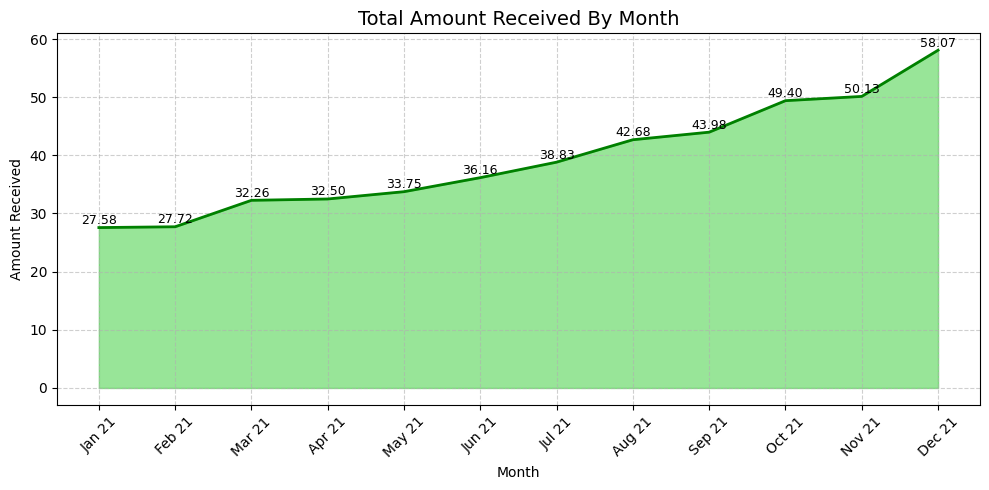

In [15]:
monthly_received = (
    df.sort_values('issue_date')
        .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %y'))
        .groupby('month_name', sort=False)['total_payment']
        .sum()
        .div(1000000)
        .reset_index(name='received_amount_millions')
)

plt.figure(figsize= (10,5))
plt.fill_between(monthly_received['month_name'],monthly_received['received_amount_millions'],color='limegreen',alpha=0.5)
plt.plot(monthly_received['month_name'],monthly_received['received_amount_millions'],color='green', linewidth=2)

for i, row in monthly_received.iterrows():
    plt.text(i, row['received_amount_millions'] + 0.1, f"{row['received_amount_millions']:.2f}",
    ha ='center', va='bottom', fontsize=9, rotation= 0, color='black')

plt.title("Total Amount Received By Month", fontsize= 14)
plt.xlabel('Month')
plt.ylabel('Amount Received')
plt.xticks(ticks=range(len(monthly_received)), labels= monthly_received['month_name'], rotation=45)
plt.grid(True, linestyle= '--', alpha=0.6)
plt.tight_layout()
plt.show()

## Monthly Trends by Issue Date For Total Loan Application

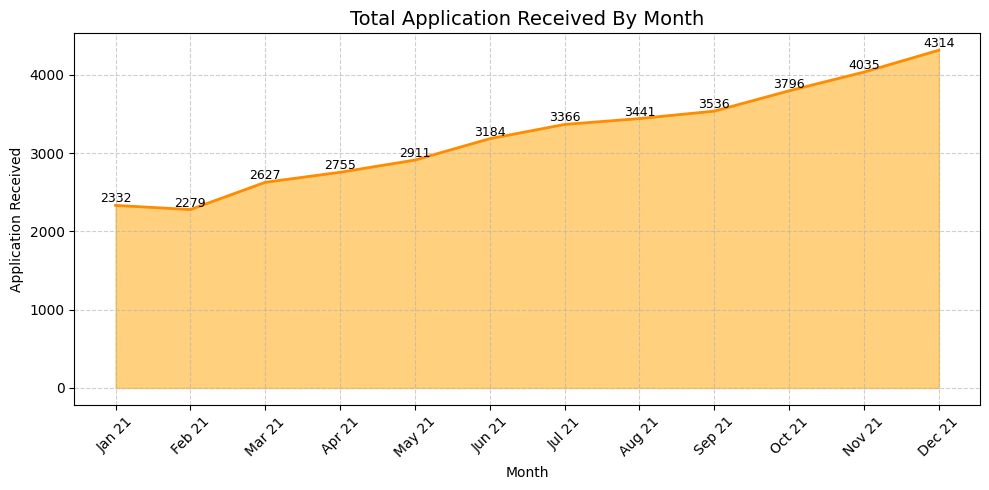

In [16]:
monthly_application = (
    df.sort_values('issue_date')
        .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %y'))
        .groupby('month_name', sort=False)['id']
        .count()
        .reset_index(name='received_app')
)
plt.figure(figsize= (10,5))
plt.fill_between(monthly_application['month_name'],monthly_application['received_app'],color='orange',alpha=0.5)
plt.plot(monthly_application['month_name'],monthly_application['received_app'],color='darkorange', linewidth=2)


for i, row in monthly_application.iterrows():
    plt.text(i, row['received_app'] + 0.1, f"{row['received_app']}",
    ha ='center', va='bottom', fontsize=9, rotation= 0, color='black')
    
plt.title("Total Application Received By Month", fontsize= 14)
plt.xlabel('Month')
plt.ylabel('Application Received')
plt.xticks(ticks=range(len(monthly_application)), labels= monthly_application['month_name'], rotation=45)
plt.grid(True, linestyle= '--', alpha=0.6)
plt.tight_layout()
plt.show()

## 2. Regional Analysis by State for Total Funded Amount

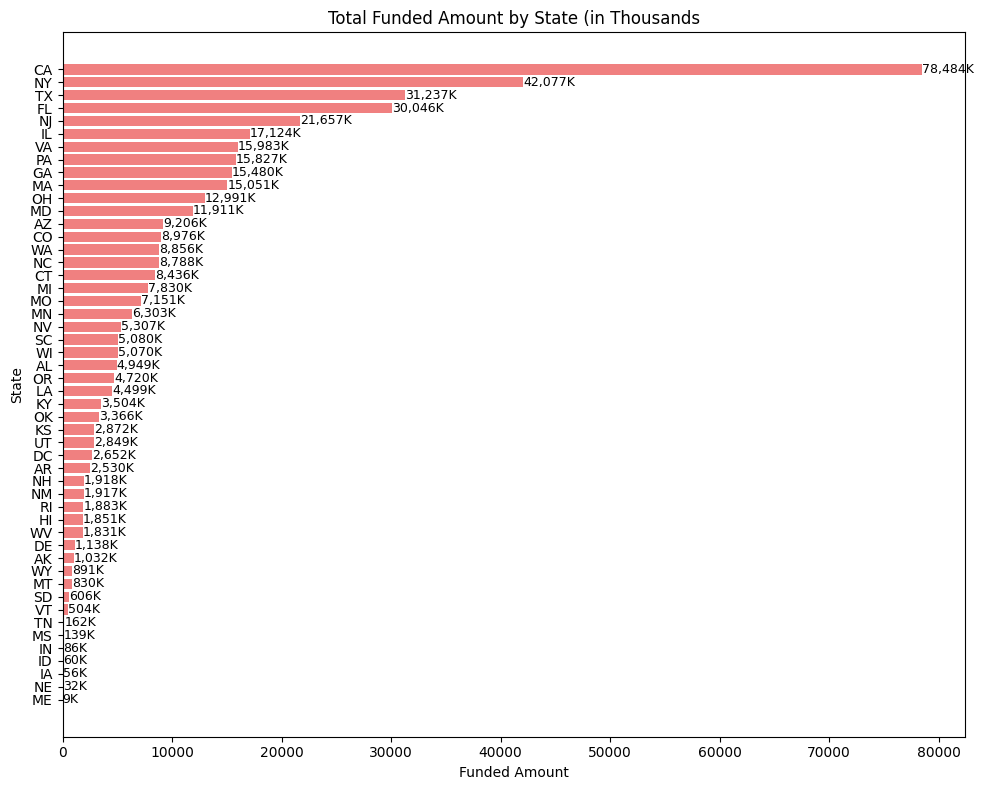

In [22]:
state_funding = df.groupby('address_state')['loan_amount'].sum().sort_values(ascending = True)
state_funding_thousands = state_funding / 1000

plt.figure(figsize =(10, 8))
bars = plt.barh(state_funding_thousands.index, state_funding_thousands.values, color='lightcoral')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height() /2,
    f"{width:,.0f}K" ,va="center", fontsize=9)

plt.title('Total Funded Amount by State (in Thousands')
plt.xlabel('Funded Amount')
plt.ylabel('State')
plt.tight_layout()
plt.show()

## 3. Loan Term Analysis By Total Amount

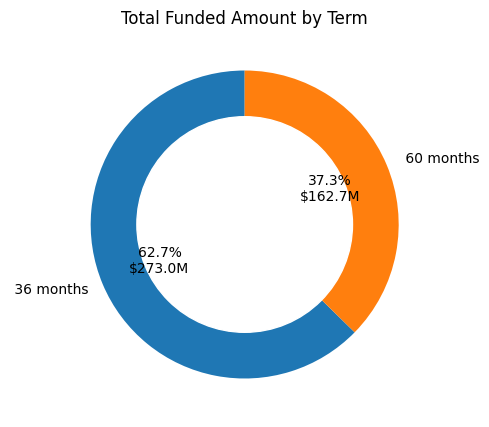

In [34]:
term_funding_millions = df.groupby('term')['loan_amount'].sum()/ 1000000

plt.figure(figsize = (5, 5))
plt.pie(
    term_funding_millions,
    labels= term_funding_millions.index,
    autopct = lambda p: f"{p:.1f}%\n${p*sum(term_funding_millions)/100:.1f}M",
    startangle = 90,
    wedgeprops = {'width' :0.4}
)
plt.gca().add_artist(plt.Circle((0,0),0.70,color = 'white'))
plt.title('Total Funded Amount by Term')
plt.show()

## 4. Employee Length by Total Funded Amount

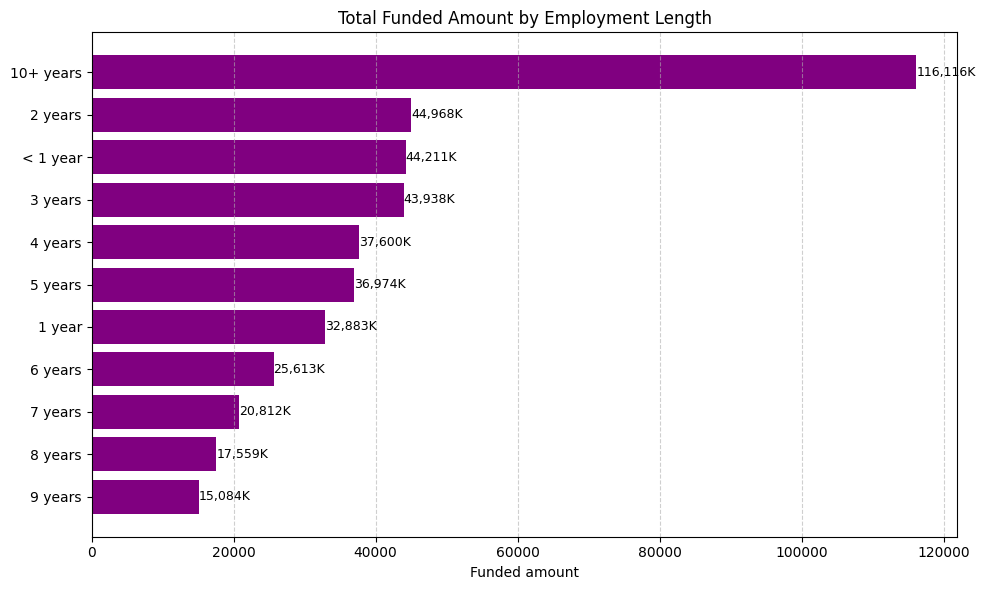

In [40]:
emp_funding = df.groupby('emp_length')['loan_amount'].sum().sort_values(ascending = True)/ 1000

plt.figure(figsize =(10 , 6))
bars = plt.barh(emp_funding.index , emp_funding.values, color='purple')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2,
             f"{width:,.0f}K", va='center', fontsize= 9)
plt.xlabel("Funded amount")
plt.title("Total Funded Amount by Employment Length")
plt.grid(axis = 'x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## 4. Loan Purpose by Total Funded Amount

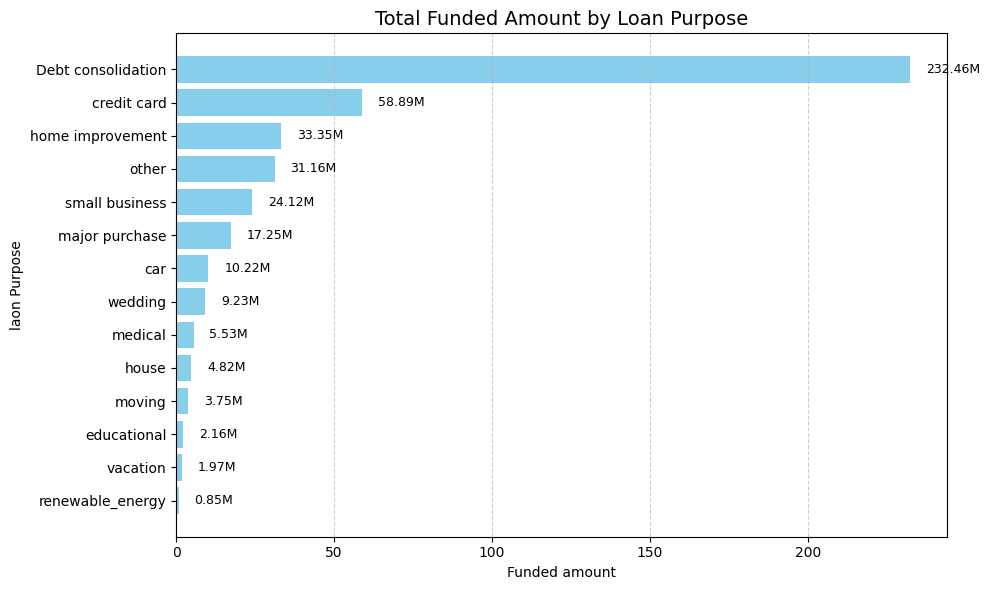

In [39]:
purpose_funding_millions = df.groupby('purpose')['loan_amount'].sum().sort_values(ascending = True)/ 1000000

plt.figure(figsize =(10 , 6))
bars = plt.barh(purpose_funding_millions.index , purpose_funding_millions.values, color='skyblue')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2,
             f"{width:,.2f}M", va='center', fontsize= 9)
    
plt.xlabel("Funded amount")
plt.ylabel("laon Purpose")
plt.title("Total Funded Amount by Loan Purpose", fontsize=14)
plt.grid(axis = 'x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## 4. Home Ownership by Total Funded Amount

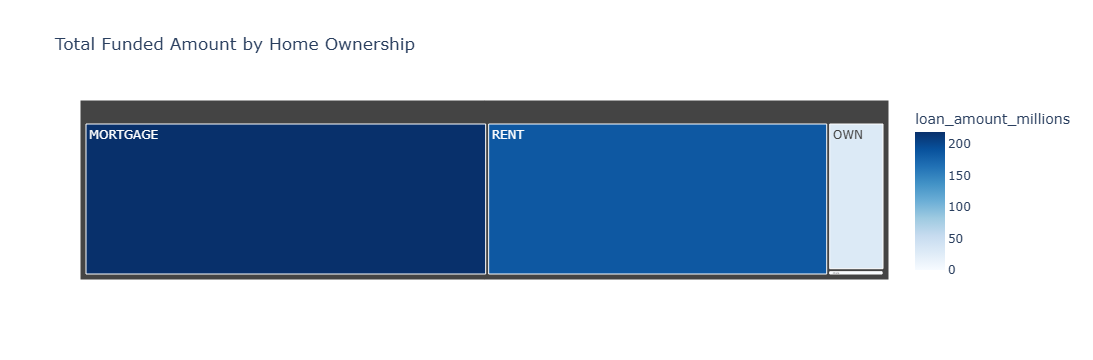

In [42]:
home_funding = df.groupby('home_ownership')['loan_amount'].sum().reset_index()
home_funding['loan_amount_millions'] = home_funding['loan_amount'] / 1000000

fig = px.treemap(
    home_funding,
    path=['home_ownership'],
    values = 'loan_amount_millions',
    color = 'loan_amount_millions',
    color_continuous_scale = 'Blues',
    title = "Total Funded Amount by Home Ownership"
)
fig.show()

In [ ]:
By:- Shivam Mourya